In [1]:
# Task 4 for fasta files manipulations. Подсчёт числа последовательностей в фаста файле
#Построение гистограммы длин последовательностей
#Подсчёт GC состава
#Построение гистограммы частоты 4-меров (по оси x каждый из возможных 4-меров, а по y - их частота)
#Переопределение метода для вывода информации при принте (достаточно текста с указанием путя к файлу)
#Выполнение всех реализованных методов по подсчёту метрик
#Можно придумать дополнительные метрики и реализовать их (по 1 баллу за каждую)

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
class FastaStat:
    def __init__(self, path):
        import Bio
        from Bio import SeqIO
        from Bio.SeqUtils import GC,molecular_weight
        self.sequences = list(SeqIO.parse(open(path),'fasta'))
        self.number = len(self.sequences)
        self.length = []
        self.gc = []
        self.molweight = []
        self.kmers = dict()
        print(self.sequences)
        for record in self.sequences:
            sequ = str(record.seq)
            print(sequ)
            self.length.append(len(sequ))
            self.gc.append(GC(sequ))
            self.molweight.append(molecular_weight(sequ))
            for i in range(0, len(sequ)-3):
                kmer = sequ[i:i+4]
                if kmer not in self.kmers.keys():
                    self.kmers[kmer] = 1
                else:
                    self.kmers[kmer] += 1
        print(self.molweight)
    
    def seq_number(self):
        print("the number of sequences in the file is ", self.number)
    
    
    def seq_length(self):
        if self.number < 20:
            b = round(self.number/2)
        else:
            b = 20
        sns.set_style('darkgrid')
        ax=sns.distplot(self.length, bins=b)
        ax.set(xlabel="length", ylabel="frequency")
        plt.show()
    
    def gc_content(self):
        if self.number < 20:
            b = round(self.number/2)
        else:
            b = 20
        sns.set_style('darkgrid')
        ax=sns.distplot(self.gc, bins=b)
        ax.set(xlabel="GC content %", ylabel="frequency")
        plt.show()
        
    def average_gc(self):
        print(sum(self.gc)/len(self.gc))
    
    def plot_molweight(self):
        if self.number < 20:
            b = round(self.number/2)
        else:
            b = 20
        sns.set_style('darkgrid')
        ax=sns.distplot(self.molweight, bins=b)
        ax.set(xlabel="molecular weight", ylabel="frequency")
        plt.show()
    
    def average_molweight(self):
        print(sum(self.molweight)/len(self.molweight))
    
    def plot_kmers(self):
        plt.bar(self.kmers.keys(), self.kmers.values(), color='g')
        plt.xticks(rotation=90)
        plt.show()
            

In [105]:
f1 = FastaStat('test_fasta.fasta')

[SeqRecord(seq=Seq('ATGCGAGAGGAGCGGGCGAGAGGTTTTTCTGGCTTTGGCGT', SingleLetterAlphabet()), id='seq1', name='seq1', description='seq1', dbxrefs=[]), SeqRecord(seq=Seq('GGGTTGAGTTAGATATGATGAAAAAAAAGCGGCGGGGGGCCCCCCCCCCCCCCC...CCC', SingleLetterAlphabet()), id='seq2', name='seq2', description='seq2', dbxrefs=[]), SeqRecord(seq=Seq('ATGTTTTTTGGGGCATCGATCTGATATTTC', SingleLetterAlphabet()), id='seq3', name='seq3', description='seq3', dbxrefs=[])]
ATGCGAGAGGAGCGGGCGAGAGGTTTTTCTGGCTTTGGCGT
GGGTTGAGTTAGATATGATGAAAAAAAAGCGGCGGGGGGCCCCCCCCCCCCCCCCCCCCCCCC
ATGTTTTTTGGGGCATCGATCTGATATTTC
[12904.176500000003, 19334.27930000001, 9303.921100000001]


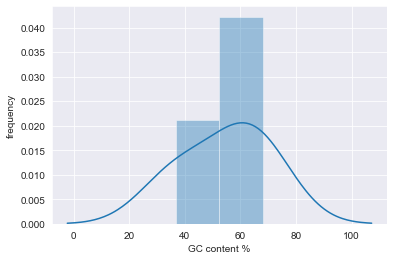

In [106]:
f1.gc_content()

In [107]:
f1.seq_number()

the number of sequences in the file is  3


c:\users\пользователь\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


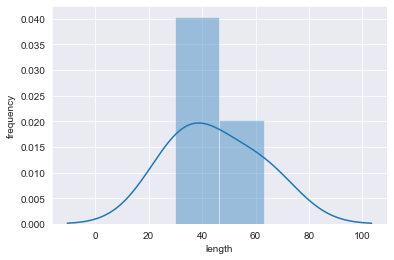

In [108]:
f1.seq_length()

In [109]:
f1.average_gc()

54.48574009549619


c:\users\пользователь\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


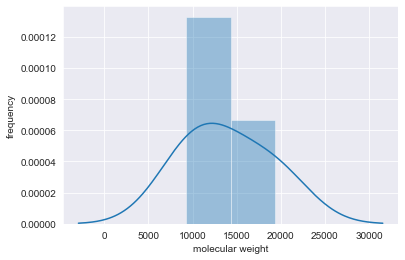

In [110]:
f1.plot_molweight()

In [111]:
f1.average_molweight()

13847.45896666667


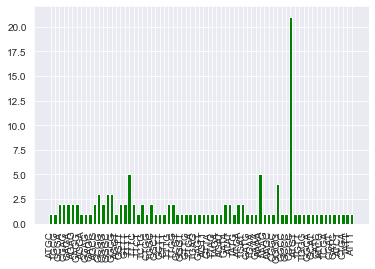

In [112]:
f1.plot_kmers()